In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Dataset Selection:

In [75]:
Log_reg=pd.read_csv("https://raw.githubusercontent.com/mohamed8905/Regression-Models/refs/heads/main/INNHotelsGroup.csv")
Log_reg

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [54]:
Log_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [55]:
Log_reg.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [56]:
Log_reg.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [57]:
# Encoding
#label encoding to type_of_meal_plan
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].str.replace("Meal Plan","")
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].str.replace("Not Selected","0")
Log_reg['type_of_meal_plan']=Log_reg['type_of_meal_plan'].astype(int)
#label encoding to room_type_reserved
Log_reg['room_type_reserved']=Log_reg['room_type_reserved'].str.replace("Room_Type","")
Log_reg['room_type_reserved']=Log_reg['room_type_reserved'].astype(int)
#label encoding to booking_status
encoder = LabelEncoder()
Log_reg['booking_status'] = encoder.fit_transform(Log_reg['booking_status'])
Log_reg['booking_status']=Log_reg['booking_status'].astype(int)
Log_reg['booking_status']=Log_reg['booking_status']^1
#label encoding to market_segment_type
encoder = LabelEncoder()
Log_reg['market_segment_type'] = encoder.fit_transform(Log_reg['market_segment_type'])
Log_reg['booking_status']=Log_reg['booking_status'].astype(int)
Log_reg

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,3,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,4,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,4,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,4,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,4,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,4,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,4,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,4,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,4,0,0,0,94.50,0,1


In [58]:
# Feature Engineering
Log_reg['num_of_days_spend']=Log_reg['no_of_weekend_nights']+Log_reg['no_of_week_nights']
Log_reg['total_peaple']=Log_reg['no_of_adults']+Log_reg['no_of_children']

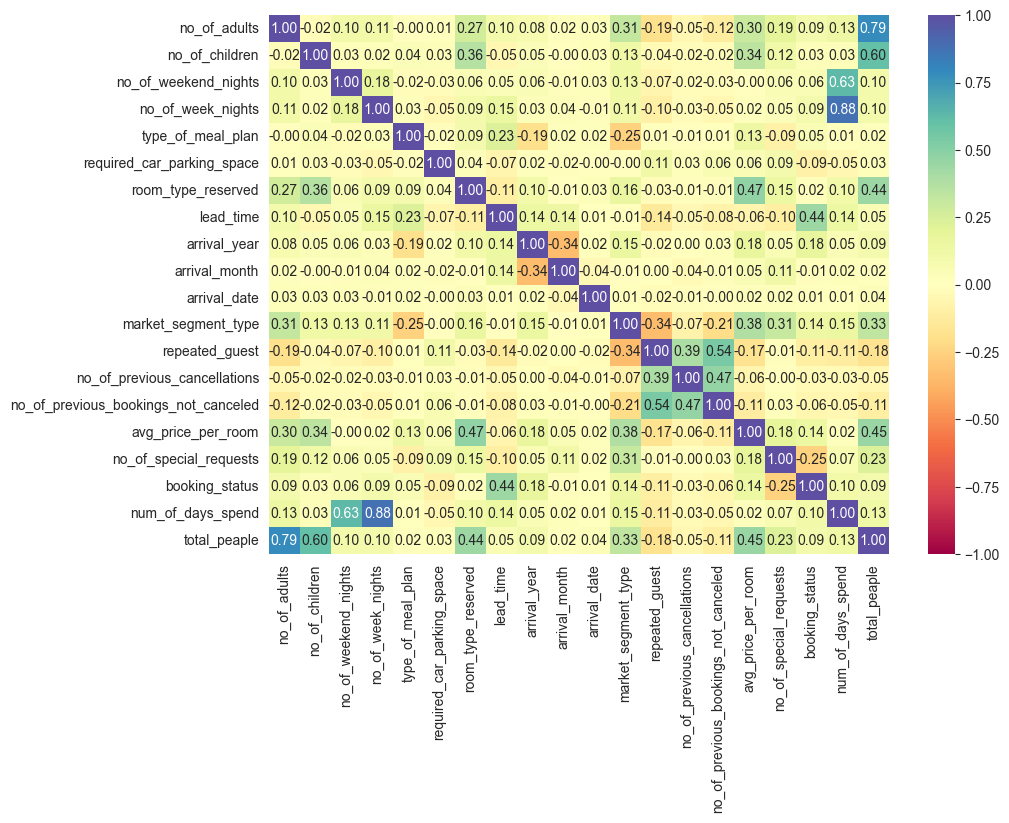

In [59]:
# Heatmap to show correlation between features 
normacalCol=Log_reg.drop(['Booking_ID'],axis=1)
plt.figure(figsize=(10, 7))
sns.heatmap(
     normacalCol.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# Data Splitting:

In [60]:
# Split data to train and test
x_data=normacalCol.drop(['booking_status'],axis=1)
y_data=Log_reg['booking_status']

x_train, x_temp, y_train, y_temp = train_test_split(x_data,y_data, train_size=0.6, random_state=42)

In [61]:
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, train_size=0.5, random_state=42)

In [62]:
# Feature Scaling 
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

# K-Nearest Neighbors (KNN) Algorithm:

In [63]:
k_values = np.arange(1, 30)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    val_acc = knn.score(x_val, y_val)
    val_accuracies.append(val_acc)

best_k = k_values[np.argmax(val_accuracies)]
print(f"Best K: {best_k}")

Best K: 4


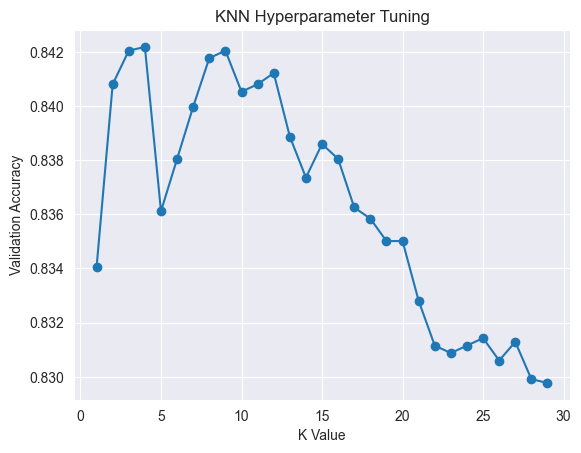

In [64]:
# Plot K vs Accuracy
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
test_acc = knn.score(x_test, y_test)
print(f"Accuracy: {test_acc:.2%}")

Accuracy: 83.85%


# Cross-Validation:

In [66]:
param_grid = {
'n_neighbors': range(1, 31),
'metric': ['euclidean', 'manhattan'] 
}
knn = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [67]:
## Setup GridSearchCV
grid_search = GridSearchCV(
estimator=knn,
param_grid=param_grid,
cv=kfold,
scoring='accuracy',
n_jobs=-1,
)

In [68]:
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.4%}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
Best CV Accuracy: 84.0616%


In [69]:
results = grid_search.cv_results_
mean_scores = np.array(results['mean_test_score']).reshape(len(param_grid['metric']), len(param_grid['n_neighbors']))

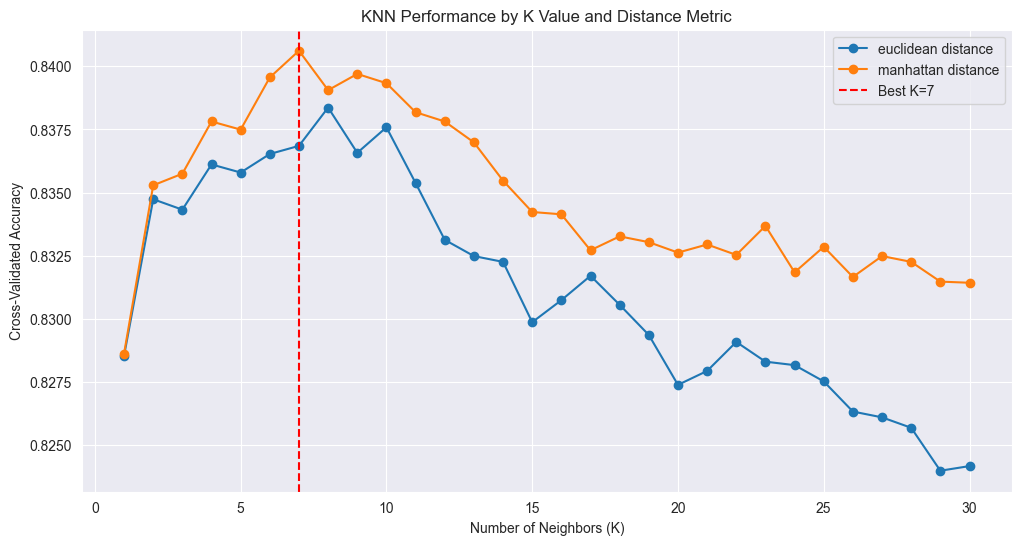

In [70]:
plt.figure(figsize=(12, 6))
for i, metric in enumerate(param_grid['metric']):
    plt.plot(param_grid['n_neighbors'], mean_scores[i],
             label=f'{metric} distance', marker='o')

plt.axvline(x=grid_search.best_params_['n_neighbors'],
            color='red', linestyle='--',
            label=f'Best K={grid_search.best_params_["n_neighbors"]}')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Performance by K Value and Distance Metric')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4834
           1       0.83      0.65      0.73      2421

    accuracy                           0.84      7255
   macro avg       0.84      0.79      0.81      7255
weighted avg       0.84      0.84      0.83      7255



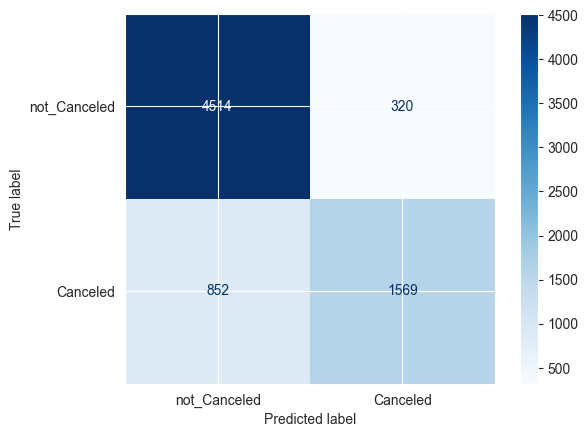

In [71]:
from sklearn.metrics import classification_report

# Train final model with best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train, y_train)
y_pred = final_knn.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_Canceled', 'Canceled'])
disp.plot(cmap='Blues')

print(classification_report(y_test, y_pred))

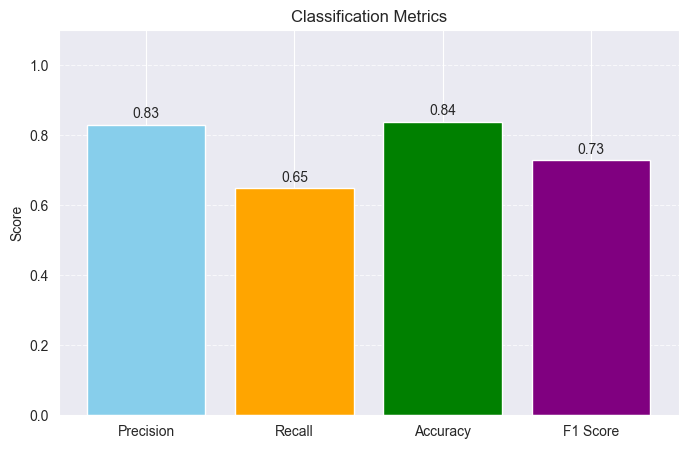

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Metric names and values
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
scores = [precision, recall, accuracy, f1]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1.1)
plt.title('Classification Metrics')
plt.ylabel('Score')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [73]:
#see data is balanced or not
Log_reg['booking_status'].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

# Overfitting and Model Improvement:

Discuss possible overfitting issues:
it's good at training but bad at testing & validation

In [74]:
# Compare train vs test performance
train_acc = final_knn.score(x_train, y_train)
test_acc = final_knn.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.2%},\nTest Accuracy: {test_acc:.2%}", end="\n\n")

if train_acc > test_acc + 0.1:
    print("Warning: Potential overfitting!")
else:
    print("No significant overfitting detected.")

Train Accuracy: 89.13%,
Test Accuracy: 83.85%

No significant overfitting detected.
